# Exploratory Data Analysis

Exploratory data analysis (EDA) is the process of looking for patterns, differences, and other features within a dataset. You are trying to analyze your dataset to summarize its main characteristics.

EDA can be used to check your data for inconsistencies or identify limitations in the data, as well as identifying trends or outliers in the data.

EDA can be done to generate ideas or hypotheses about your population of interest.

EDA is often done visually, by creating plots, or numerically, by calculating **descriptive statistics**.

The tools that you use depend on whether you are looking at numeric or categorical variables.

## Numerical Variables

You'll start by exploring a numerical variable. Specifically, you'll be looking at the salaries and the heights of the players for the 2019-2020 Los Angeles Lakers.

### Descriptive Statistics

**Goal:** Describe a data set in terms of its important features. Summarize a data set using just a few numbers and/or a plot. Rather than looking at the entire dataset at once, convert it into an easily digestible form.

There are three major categories of descriptive statistics:
* Measures of Central Tendency
* Measures of Variability/Spread
* Measures of Position

# Measures of Central Tendency

Give a central or "typical" value of a data set.

Most common measures of central tendency:
* mean
* median
* mode

## Mean

Also known as the *average* or *arithmetic mean*. Defined as total (sum) of the values of a set of observations divided by the number of observations. When calculating the mean, the only difference between a sample and population mean is the notation.

$$\text{Sample Mean: } \bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n} = \frac{\sum\limits_{i=1}^n x_i}{n}$$

$$\text{Population Mean: } \mu = \frac{x_1 + x_2 + \cdots + x_n}{n} = \frac{\sum\limits_{i=1}^n x_i}{n}$$

The mean represents the “balance point” of the data. 

It is the amount that all observations would have if the total amount of the variable was evenly distributed to all observations.

You will be using the `pandas` and `numpy` libraries to perform some of your calculations and the `pyplot` module from `matplotlib`. You must first import these library. You will *alias* `pandas` as `pd` so that when you refer to it later, you only need to type `pd`. Similarly, you will alias `numpy` and `matplotlib.pyplot`. Finally, you'll add the `%matplotlib inline` *magic* so that your plots will display in your notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

First, we'll read in the dataset from a csv file.

In [2]:
lakers = pd.read_csv('../data/Lakers.csv')

Take a look at it.

In [3]:
lakers

,player,salary,height_inches
0,LeBron James,37436858,80
1,Anthony Davis,27093019,82
2,Danny Green,14634146,78
3,Kentavious Caldwell-Pope,8089282,77
4,Avery Bradley,4767000,74
5,JaVale McGee,4000000,84
6,DeMarcus Cousins,3500000,83
7,Quinn Cook,3000000,74
8,Alex Caruso,2750000,77
9,Jared Dudley,2564753,79


First, you'll manually calculate the mean, so that you can see how to use some of the methods available in `pandas`. 

To use a dataframe method, you normally type the name of the dataframe followed by a . and the name of the method you wish to use. 

Note also that when using methods, you need to put a set of parentheses after the name of the method.

In [4]:
lakers['salary'].sum()

117866068

In [5]:
lakers['salary'].count()

15

In [6]:
lakers['salary'].sum() / lakers['salary'].count()

7857737.866666666

The `pandas` library has many of the common descriptive statistics available as methods. For example, to compute the mean salary, you didn't need to compute the sum and count, instead you could have taken advantage of the `mean` method.

In [7]:
lakers['salary'].mean()

7857737.866666666

This says that if you distributed the total payroll evenly to all players, they would each receive a salary of $7,857,737.

Look back at the full dataset and notice that only 4 out of the 15 players made above the average, with the top three players making significantly higher than the average. This is typical for data sets where you have extreme observations.

In this case, since Lebron James and Anthony Davis earn much higher salaries than the typical player, they end up pulling the average salary up.

You can also calculate the mean player height.

In [8]:
lakers['height_inches'].mean()

78.46666666666667

Sort the table by height now to see how the mean compares to the overall distribution.

In [9]:
lakers.sort_values('height_inches').reset_index(drop=True)

,player,salary,height_inches
0,Rajon Rondo,2564753,73
1,Avery Bradley,4767000,74
2,Quinn Cook,3000000,74
3,Troy Daniels,2028594,76
4,Talen Horton-Tucker,898310,76
5,Kentavious Caldwell-Pope,8089282,77
6,Alex Caruso,2750000,77
7,Danny Green,14634146,78
8,Jared Dudley,2564753,79
9,LeBron James,37436858,80


You see that the average height, being between the 8th and 9th observation, is almost exactly in the middle of the overall distribution.

### Outliers

Lebron James' salary is so much larger than the rest of the players, that it could be classified as an **outlier**. An outlier is a data point which differs significantly from other observations. It is either much higher or much lower than almost all others.

There is no precise definition of an "outlier", and it often depends on particular data set you a looking at and on applying some domain knowledge of the problem at hand. We will see some common rule-of-thumbs for labeling observations as outliers in following sections.

If a dataset contains outliers, certain descriptive statistics can be misleading. In our case, Lebron James' salary increases the mean so that only 4 players in the dataset have salaries larger than the mean salary.

Depending on what you are doing with your dataset, you may or may not need to do anything besides note any points that may be outliers. When doing exploratory analysis, the main thing you need to do with outliers is take note of them and think about them. If you are looking at a sample trying to understand a larger population, you can think about the process that led to the outliers in your sample and what that means about the larger population.

If you are concerned about outliers or think that there is a good chance that your dataset contains outliers, there are other descriptive statistics which are not as sensitive to them. Such statistics are termed as **robust** statistics.

## Median

The **median** is the number which divides the dataset exactly in half. It is the middle value if the data is arranged by size.

For an odd number of observations, the median will be a value from the data set.

For an even number of observations, the median is the mean of the two centermost observations.

In our `lakers` dataset, we have 15 observations, which means that the 8th observation corresponds to the median. In this case, Quinn Cook, who has a salary of $3,000,000.

In [10]:
lakers['salary'].median()

3000000.0

We can also look at the median height.

In [11]:
lakers['height_inches'].median()

78.0

Notice that the mean and median heights are very close to each other, whereas the mean and median salaries are quite far apart. If the mean and median are quite different, this is often a sign of either the presence of outliers or that you are working with a *skewed* dataset. You'll learn more about skewed datasets later in this notebook.

## Trimmed Mean

Another option to reduce the effect of outliers is to use a **trimmed mean**. To compute the trimmed mean, you can remove the largest and smallest *x*% of observations and then calculate the mean. Often, the largest and smallest 10% are removed. This is a compromise between the mean and the median, in that it still takes into account a large portion of the dataset, while being less influeced by extreme observations.

To calculate the trimmed mean, you can use the `trim_mean` function from the `scipy` `stats` module. To use this function, you need to pass in the data and specify the `proportiontocut` argument, as a decimal.

In [12]:
from scipy.stats import trim_mean

In [13]:
trim_mean(lakers['salary'], proportiontocut=0.1)

6117761.538461538

In [14]:
trim_mean(lakers['height_inches'], proportiontocut=0.1)

78.46153846153847

## Distribution Shape

When looking at a numerical variable, we can also inspect the *shape* of the distribution of that variable.

The **distribution** refers to the possible values of that variable and which values occur more or less frequently than others.

When talking about the shape of a distribution, there are a few different aspects we can examine:
* **Symmetry:** Is the distribution symmetric? If so, is it "bell-shaped"? Is it flat?
* **Skewness:** If it is not symmetic, does it have a long tail to one side?
* **Peaks/Modes:** How many peaks does it have? Unimodal? Bimodal? Multimodal?
* **Spread:** How narrow/wide is the distribution?

### Histograms

If you are trying to understand the shape of the distribution of a variable, the most common tool to use is the histrogram.

A histogram shows how many observations lie within a certain class interval. That is, it divides the dataset into *bins*, and the height of the plot above each interval is proportional to the number of observations that fall within that bin.

Procedure:
* Separate data into equal-width, non-overlapping bins
* Count number of data points in each bin

When constructing a histogram, you must decide how many bins to use. A common rule of thumb is: $\text{number of bins} = \sqrt{\text{sample size}}$

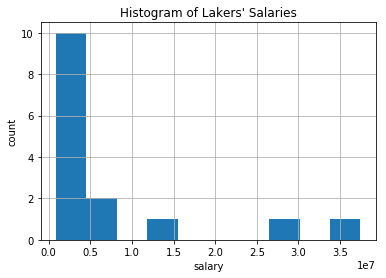

In [15]:
lakers['salary'].hist()
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Salaries');

Sometimes, you need to adjust the number of bins in order to get a clearer idea of the distribution of your dataset.

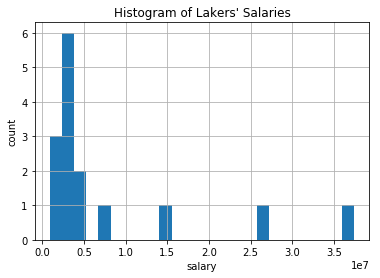

In [16]:
lakers['salary'].hist(bins = 25)
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Salaries');

For the Lakers salary dataset, you can see that there are a few unusually large observations. Another way to say this is that the dataset has a long tail to the right. It is most definitely not symmetric.

When a dataset has a long tail to the right, you say that it is **right-skewed**. 

Analogously, a dataset with a long tail to the left (unusually small observations) would be said to be **left-skewed**.

For the distribution of salaries, there appears to be a single peak on the left, so this dataset would be classified as **unimodal**.

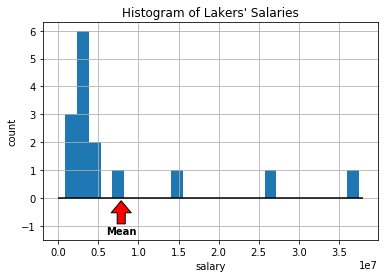

In [17]:
lakers.salary.hist(bins = 25)
plt.hlines(y = 0, xmin = 0, xmax = lakers['salary'].max() + 500000)
plt.annotate(s = 'Mean', ha = 'center', va = 'top', fontweight = 'bold',
             xy = (lakers['salary'].mean(), -.1), xytext = (lakers['salary'].mean(), -1), arrowprops=dict(width = 8, headwidth = 20, facecolor = 'red'))
plt.ylim(-1.5, 6.3)
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Salaries');

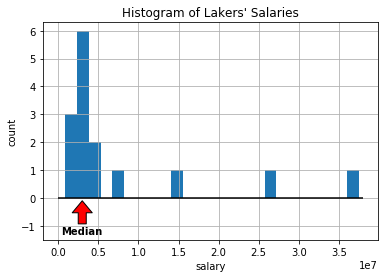

In [18]:
lakers['salary'].hist(bins = 25)
plt.hlines(y = 0, xmin = 0, xmax = lakers.salary.max() + 500000)
plt.annotate(s = 'Median', ha = 'center', va = 'top', fontweight = 'bold',
             xy = (lakers['salary'].median(), -.1), xytext = (lakers['salary'].median(), -1), arrowprops=dict(width = 8, headwidth = 20, facecolor = 'red'))
plt.ylim(-1.5, 6.3)
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Salaries');

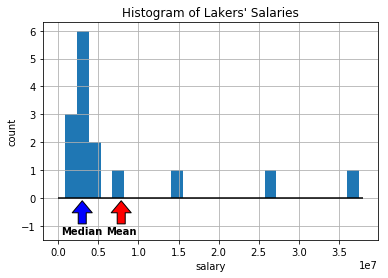

In [19]:
lakers.salary.hist(bins = 25)
plt.hlines(y = 0, xmin = 0, xmax = lakers['salary'].max() + 500000)
plt.annotate(s = 'Mean', ha = 'center', va = 'top', fontweight = 'bold',
             xy = (lakers['salary'].mean(), -.1), xytext = (lakers['salary'].mean(), -1), arrowprops=dict(width = 8, headwidth = 20, facecolor = 'red'))
plt.annotate(s = 'Median', ha = 'center', va = 'top', fontweight = 'bold',
             xy = (lakers['salary'].median(), -.1), xytext = (lakers['salary'].median(), -1), arrowprops=dict(width = 8, headwidth = 20, facecolor = 'blue'))
plt.ylim(-1.5, 6.3)
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Salaries');

You can also look at the distribution of heights.

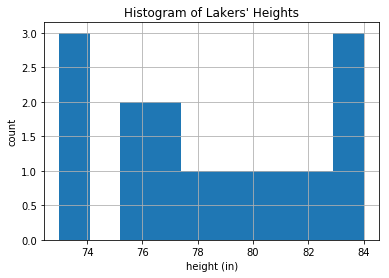

In [20]:
lakers['height_inches'].hist()
plt.xlabel('height (in)')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Heights');

This is a small dataset, so it's hard to definitively classify the shape. It does not appear to be skewed, but is also not symmetric, since there are more values on the lower range than on the upper range.

There are two peaks, one on either side, so it could be classified as a **bimodal** distribution.

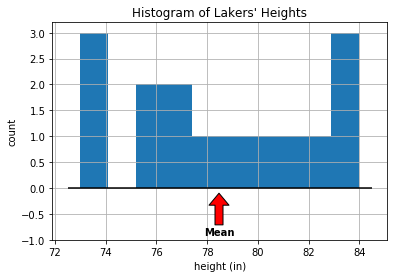

In [21]:
lakers.height_inches.hist()
plt.hlines(y = 0, xmin = lakers['height_inches'].min() - 0.5, xmax = lakers['height_inches'].max() + 0.5)
plt.annotate(s = 'Mean', ha = 'center', va = 'top', fontweight = 'bold',
             xy = (lakers['height_inches'].mean(), -.1), xytext = (lakers['height_inches'].mean(), -.75), arrowprops=dict(width = 8, headwidth = 20, facecolor = 'red'))
plt.ylim(-1, 3.2)
plt.xlabel('height (in)')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Heights');

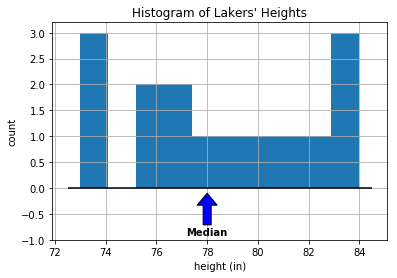

In [22]:
lakers.height_inches.hist()
plt.hlines(y = 0, xmin = lakers['height_inches'].min() - 0.5, xmax = lakers['height_inches'].max() + 0.5)
plt.annotate(s = 'Median', ha = 'center', va = 'top', fontweight = 'bold',
             xy = (lakers['height_inches'].median(), -.1), xytext = (lakers['height_inches'].median(), -.75), arrowprops=dict(width = 8, headwidth = 20, facecolor = 'blue'))
plt.ylim(-1, 3.2)
plt.xlabel('height (in)')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Heights');

# Measures of Spread

**Goal:** Give an idea of how similar or varied the observations in the dataset are.

## Range

The range measures how "wide" a dataset is. It depends only on the largest and smallest observations, so it is highly influenced by outliers.

$$ \text{range} = \text{maximum observation} - \text{minimum observation}$$

In [23]:
lakers['salary'].max()

37436858

If you want to know who has the largest salary, you can use the `nlargest` method.

In [24]:
lakers.nlargest(1, 'salary')

,player,salary,height_inches
0,LeBron James,37436858,80


Similar for the minimum.

In [25]:
lakers['salary'].min()

898310

In [26]:
lakers.nsmallest(1, 'salary')

,player,salary,height_inches
14,Talen Horton-Tucker,898310,76


To find the range, you can subtract the minimum value from the maximum value.

In [27]:
lakers['salary'].max() - lakers['salary'].min()

36538548

The difference between the highest paid and lowest paid Laker is over \$36 million.

In [28]:
from nssstats.plots import range_plot

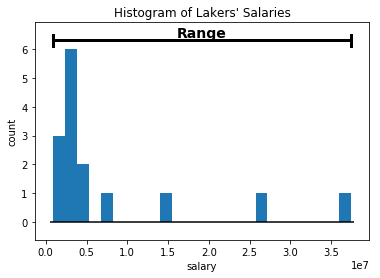

In [29]:
range_plot(lakers['salary'], bins = 25)
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Salaries');

What about for heights?

In [30]:
lakers['height_inches'].max() - lakers['height_inches'].min()

11

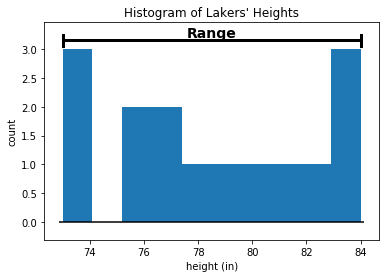

In [31]:
range_plot(lakers['height_inches'])
plt.xlabel('height (in)')
plt.ylabel('count')
plt.title('Histogram of Lakers\' Heights');

There is less than a foot of difference between the tallest and shortest players.

## Variance and Standard Deviation

The range of a dataset gives a quick glance at how varied a dataset is. It does have a major drawback, though, in that it only depends on two data points: the largest and smallest. What if you want to consider the entire dataset?

You could start by looking at the deviations from the mean. That is, we could look at the difference between a player's salary and the mean salary.

In [159]:
from ipywidgets import interact, IntSlider, fixed
from nssstats.plots import deviation_plot

In [160]:
interact(deviation_plot, Player = lakers['player'], df = fixed(lakers));

interactive(children=(Dropdown(description='Player', options=('LeBron James', 'Anthony Davis', 'Danny Green', …

Notice how this deviation is positive if the player makes an above-average salary and negative if he makes a below-average salary.

Now, what if you want to look at how large these deviations are on average? There is one problem with simply taking the average of the deviations: if you were to sum the deviations, you would get zero, meaning that, on average, the deviation is zero.

So, if you want a way to consider the average deviation, you must get rid of the negatives. One option is to simply take the absolute value, but the math works out nicer if instead you square the deviations.

That is, for each datapoint $x_i$, look at the squared deviation $(x_i - \mu)^2$.

If you now take the mean of these squared deviations, you get what is called the **variance**. Note that this formula is only valid if you are looking at a population. You'll see the difference for a sample shortly.
$$\text{Population Variance: } \sigma^2 = \frac{\sum\limits_{i = 1}^n(x_i - \mu)^2}{n}$$

There is only one problem now: the variance is is squared units, not in our original unit. If we want to convert it to the starting units, you can take the square root and obtain what is called the **standard deviation**:

$$\text{Population Standard Deviation: } \sigma = \sqrt{\sigma^2} $$

When working with sample, there is a small modification that must be done to calculate the variance and standard deviation. Instead of dividing the $n$, the number of observations, you instead divide by $n-1$:

$$\text{Sample Variance: } s^2 = \frac{\sum\limits_{i = 1}^n(x_i - \bar{x})^2}{n - 1}$$

$$\text{Sample Standard Deviation: } s = \sqrt{s^2} $$

Why the difference? When working with a sample, you divide by $n - 1$, that is, one less than the number of observations. Informally, the reason that you do this is that you are trying to approximate the population variance. You want to estimate the deviation from the mean, but at the same time, you don't know the true population mean to start with, only an estimate from the sample ($\bar{x}$). So you are making an estimate using an estimate. To compensate for this, you need to inflate your estimate of the variance slightly, by dividing by $n - 1$ instead of $n$.

By default, most function that calculate the variance or standard deviation will assume that you are looking at a sample. However, in this case, you have the entire population, so you need to adjust it. If you are using `pandas` methods, you can specify `ddof = 0`, which sets the "delta degrees of freedom", or the amount that the "degrees of freedom" differ from the number of observations, to be 0.

If you are calculating the standard deviation of a sample, you need to use `ddof = 1` (which is the default behavior).

In [69]:
lakers['salary'].var(ddof = 0)

105671728309241.28

In [70]:
lakers['salary'].std(ddof = 0)

10279675.496300517

Let's see the details of the calculation to try and get a better understanding of what it is measuring.

In [71]:
lakers['deviation_from_mean'] = lakers['salary'] - lakers['salary'].mean()
lakers

,player,salary,height_inches,deviation_from_mean
0,LeBron James,37436858,80,2.957912e+07
1,Anthony Davis,27093019,82,1.923528e+07
2,Danny Green,14634146,78,6.776408e+06
3,Kentavious Caldwell-Pope,8089282,77,2.315441e+05
4,Avery Bradley,4767000,74,-3.090738e+06
5,JaVale McGee,4000000,84,-3.857738e+06
6,DeMarcus Cousins,3500000,83,-4.357738e+06
7,Quinn Cook,3000000,74,-4.857738e+06
8,Alex Caruso,2750000,77,-5.107738e+06
9,Jared Dudley,2564753,79,-5.292985e+06


First you will square each salary's distance from the mean so that you are looking at distances as positive variations whether they are above or below the mean.

In [72]:
lakers['squared_deviation'] = lakers['deviation_from_mean']**2
lakers

,player,salary,height_inches,deviation_from_mean,squared_deviation
0,LeBron James,37436858,80,2.957912e+07,8.749243e+14
1,Anthony Davis,27093019,82,1.923528e+07,3.699960e+14
2,Danny Green,14634146,78,6.776408e+06,4.591971e+13
3,Kentavious Caldwell-Pope,8089282,77,2.315441e+05,5.361269e+10
4,Avery Bradley,4767000,74,-3.090738e+06,9.552661e+12
5,JaVale McGee,4000000,84,-3.857738e+06,1.488214e+13
6,DeMarcus Cousins,3500000,83,-4.357738e+06,1.898988e+13
7,Quinn Cook,3000000,74,-4.857738e+06,2.359762e+13
8,Alex Caruso,2750000,77,-5.107738e+06,2.608899e+13
9,Jared Dudley,2564753,79,-5.292985e+06,2.801569e+13


Calculate the mean value for the squared deviations.

In [73]:
lakers['squared_deviation'].mean()

105671728309241.28

Next find the square root of the average squared deviation to get the deviation in absolute terms - regardless of whether is is above or below the mean - _and_ in the original units of measurment.

In [74]:
np.sqrt(lakers['squared_deviation'].mean())

10279675.496300517

In [64]:
from nssstats.plots import std_plot

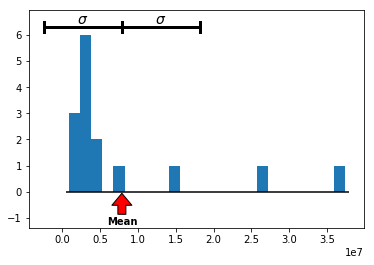

In [65]:
std_plot(lakers['salary'], bins = 25)

Let's compare with the standard deviation for heights.

In [66]:
lakers['height_inches'].std(ddof = 0)

3.461534662865912

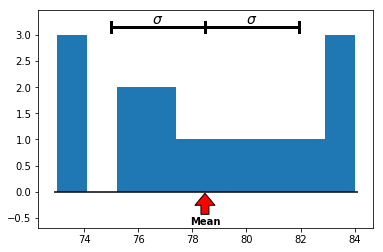

In [67]:
std_plot(lakers['height_inches'])

## $z$-scores

Often, you are not as interested in understanding "how much", but instead "how different from average?". That is, you may wish to measure how "unusual" a particular observation is. 

A $z$-score allows you to answer this question, in terms of the number of standard deviations from the mean. It is *unitless*, which means that it does not depend on what is being measured and the scale of the measurements, but instead you can compare across different types of measurements.

$$ z\text{-score} = \frac{\text{observation} - \text{mean}}{\text{standard deviation}}$$

A $z$-score of 1.4 says that an observation is 1.4 standard deviations larger than the average value, whereas a $z$-score of -2.8 says that an observation is 2.8 standard deviations lower than the mean.

If a dataset is reasonably close to being normally-distributed (meaning that the histogram looks roughly bell-shaped), then it will be highly unusual for an observation to have a $z$-score with magnitude 3 or larger.

**Warning**: Be cautious when using $z$-scores for small datasets, as the maximum $z$-score is limited to $\frac{n−1}{\sqrt{n}}$ For example, for our dataset of 15 observations, the maximum $z$-score is $\frac{14}{\sqrt{15}} \approx 3.6$. 

Further complicating the situation is that the presence of an outlier can inflate the mean and standard deviation, especially for a small dataset, which further distorts the interpretation of $z$-scores.

In [68]:
lakers['salary_z-score'] = (lakers['salary'] - lakers['salary'].mean()) / lakers['salary'].std(ddof = 0)
lakers

,player,salary,height_inches,salary_z-score,height_z-score
0,LeBron James,37436858,80,2.877437,0.442963
1,Anthony Davis,27093019,82,1.871195,1.020742
2,Danny Green,14634146,78,0.659204,-0.134815
3,Kentavious Caldwell-Pope,8089282,77,0.022524,-0.423704
4,Avery Bradley,4767000,74,-0.300665,-1.290372
5,JaVale McGee,4000000,84,-0.375278,1.598520
6,DeMarcus Cousins,3500000,83,-0.423918,1.309631
7,Quinn Cook,3000000,74,-0.472558,-1.290372
8,Alex Caruso,2750000,77,-0.496877,-0.423704
9,Jared Dudley,2564753,79,-0.514898,0.154074


In [69]:
lakers['height_z-score'] = (lakers['height_inches'] - lakers['height_inches'].mean()) / lakers['height_inches'].std(ddof = 0)
lakers

,player,salary,height_inches,salary_z-score,height_z-score
0,LeBron James,37436858,80,2.877437,0.442963
1,Anthony Davis,27093019,82,1.871195,1.020742
2,Danny Green,14634146,78,0.659204,-0.134815
3,Kentavious Caldwell-Pope,8089282,77,0.022524,-0.423704
4,Avery Bradley,4767000,74,-0.300665,-1.290372
5,JaVale McGee,4000000,84,-0.375278,1.598520
6,DeMarcus Cousins,3500000,83,-0.423918,1.309631
7,Quinn Cook,3000000,74,-0.472558,-1.290372
8,Alex Caruso,2750000,77,-0.496877,-0.423704
9,Jared Dudley,2564753,79,-0.514898,0.154074


From this, you can see that the heights of players on the team show (relatively) less dispersion. While Lebron James' salary is nearly 3 standard deviations above the average salary, the tallest player is only about 1.6 standard deviations above average.

Further, you can see that the distributions of heights is much more symmetric, and does not have a tail to either side. At the same time, for this distribution, it is not really bell-shaped either, since you do not see a large number of players near the average height.

## Relative Standard Deviation (Coefficient of Variation)

What if you want to compare the entire distribution in terms of its dispersion instead of just the dispersion of a single observation? Again, if we are comparing measurements on vastly different scales (inches vs millions of dollars), the units of the measurement can obscure the true picture. You can compute the *coefficient of variation*, which will allow you to compare distributions, without having to consider the units. It is defined as the ratio of the standard deviation to the mean.

$\text{CV} = \frac{\sigma}{\mu}$

For salaries:

In [70]:
lakers['salary'].std(ddof = 0) / lakers['salary'].mean()

1.3082232661270057

This says that the standard deviation is 1.3 times as large as the mean.

For heights:

In [71]:
lakers['height_inches'].std(ddof = 0) / lakers['height_inches'].mean()

0.044114715329642035

On the other hand, there is very little variation in heights.

# Measures of Position

Measures of position have to do with ranking where an observation is in the dataset with respect to all other values.

## Quartiles and Quantiles/Percentiles

You have already encountered a special case of quantiles and percentiles, in the form of the median. Recall that the median of a dataset is middle observation, if the observations are placed in ascending order. Another way to view this is that the median separates the lower half of the dataset from the upper half.

Instead of dividing a dataset into halves, **quartiles** divide a dataset into quarters. The **first quartile** separates the smallest quarter of observations from the highest three-quarters, the **second quartile**, aka the median, separates the smallest half of observations from the largest half of observations, and the **third quartile** separates the smallest three-quarters from the largest quarter of observations.

In [72]:
lakers['salary'].quantile(q = 0.25)

2564753.0

In [73]:
lakers['salary'].quantile(q = 0.5)

3000000.0

In [74]:
lakers['salary'].quantile(q = 0.75)

6428141.0

You can use the quantiles to find the **interquartile range**, which is defined as the distance from the first to the third quartile. In a way, it is a trimmed version of the range, which is not as sensitive to extreme values.

In [75]:
lakers['salary'].quantile(q = 0.75) - lakers['salary'].quantile(q = 0.25)

3863388.0

In [76]:
from nssstats.plots import iqr_plot

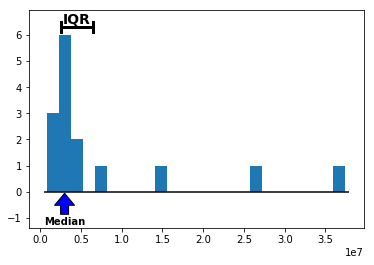

In [77]:
iqr_plot(lakers['salary'], bins = 25)

This tells us that the middle half of observations all fall into a range of width $3.8 million.

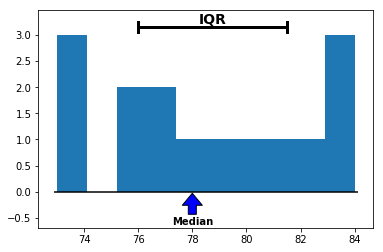

In [78]:
iqr_plot(lakers['height_inches'])

More generally, you can look at the quantiles or percentiles. The $n$th percentile separtes the lowest $n$% of observations from the rest. For example, the 90th percentile divides the lowest 90% of observations from the highest 10%. 

To find percentiles, you can use the quantile function from pandas.

In [79]:
lakers['salary'].quantile(q = 0.1)

1996197.6

In [80]:
lakers['salary'].quantile(q = 0.9)

22109469.799999997

Percentiles can be used to identify unusual observations, or to trim outliers from a data set.

If you want to understand how a variable is distributed, you have already seen how to use a histogram. An alternative type of plot that you can use is a **boxplot** (aka **box-and-whiskers plot**). This type of plot displays a box which starts at the first quartile and extend to the third quartile, with the second quartile marked. It also has whiskers that extend to last observations contained within the **outlier boundaries**. 

These boundaries are (usually) defined as being at 1.5 times the interquartile range below the first quartile and above the third quartile. Any points outside of the outiler boundaries are plotted individually.

In [81]:
import seaborn as sns

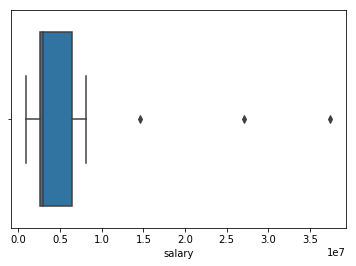

In [82]:
sns.boxplot(lakers['salary']);

Looking at the boxplot, we can detect that most salaries are less than \$10 million, but that there are three players with very high salaries.

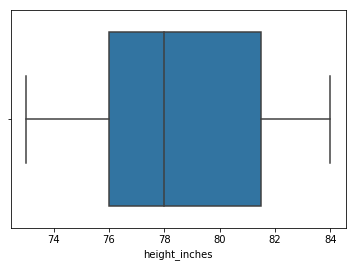

In [83]:
sns.boxplot(lakers['height_inches']);

Boxplots are also good for comparing the distribution of a variable across two or more categories. For example, let's compare salaries for the Lakers to salaries for the Memphis Grizzlies.

In [84]:
lakers_grizzlies = pd.read_csv('../data/Lakers_Grizzlies.csv')

In [85]:
lakers_grizzlies

,player,salary,team
0,Gorgui Dieng,16229213,Grizzlies
1,Jonas Valančiūnas,16000000,Grizzlies
2,Justise Winslow,13000000,Grizzlies
3,Kyle Anderson,9073050,Grizzlies
4,Ja Morant,8730240,Grizzlies
5,Tyus Jones,8408000,Grizzlies
6,Josh Jackson,7059480,Grizzlies
7,Jaren Jackson,6927480,Grizzlies
8,Marko Guduric,2625000,Grizzlies
9,Brandon Clarke,2478840,Grizzlies


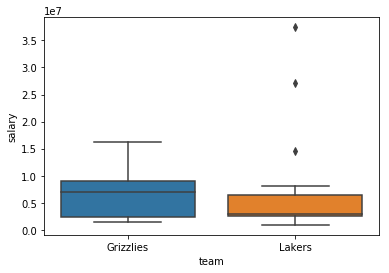

In [86]:
sns.boxplot(data = lakers_grizzlies, x = "team", y = "salary");

From this boxplot, you can see that the Grizzlies have a wider interquartile range and higher median salary with no points considered as outliers. This may be due in part to the NBA's salary cap, which limits the total payroll of each team. Since the Lakers have several extremely highly-compensated players, it leaves less money to go around to the remaining players.

You will now look at a dataset consisting of a sample 1000 home appraisal values from Nashville/Davidson County in the year 2009.

In [87]:
houses_2009 = pd.read_csv('../data/appraisal_sample.csv')

houses_2009.head()

,council_district,total_appr,finished_area,year
0,2,129400.0,2243.0,2009
1,26,174700.0,1408.0,2009
2,4,299200.0,3037.0,2009
3,15,141600.0,1770.0,2009
4,33,80600.0,973.0,2009


In [88]:
houses_2009['total_appr'].mean()

221595.34166666667

In [89]:
houses_2009['total_appr'].median()

161250.0

In [90]:
houses_2009['total_appr'].max()

6533800.0

In [91]:
houses_2009['total_appr'].min()

10200.0

In [92]:
houses_2009['total_appr'].max() - houses_2009['total_appr'].min()

6523600.0

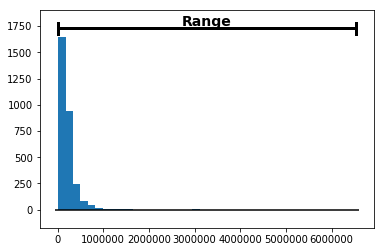

In [93]:
range_plot(houses_2009['total_appr'], bins=40)

In [94]:
houses_2009['total_appr'].std(ddof = 1)

241083.522192335

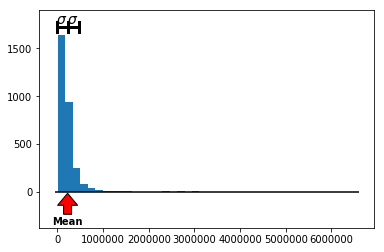

In [95]:
std_plot(houses_2009['total_appr'], bins = 40)

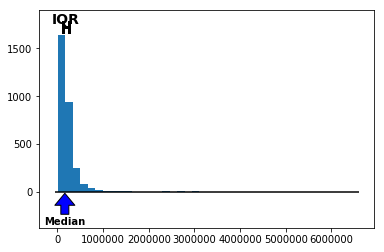

In [96]:
iqr_plot(houses_2009['total_appr'], bins = 40)

You have seen that there is a large range and standard deviation in this dataset. Find the potential outilers for this dataset by looking at $z$-scores.

In [97]:
mu = houses_2009['total_appr'].mean()
sigma = houses_2009['total_appr'].std()

In [98]:
houses_2009['z_score'] = (houses_2009['total_appr'] - mu) / sigma

You can inspect those houses which have very large z-scores. To filter a dataframe, you can pass in an inequality inside a bracket, like in the following cell:

In [99]:
houses_2009[houses_2009['z_score'] > 3].sort_values('total_appr', ascending = False)

,council_district,total_appr,finished_area,year,z_score
1361,34,6533800.0,7882.00000,2013,26.182647
950,23,3092400.0,7893.50000,2009,11.907926
819,34,3010100.0,7782.00000,2009,11.566550
632,34,2997500.0,7090.39990,2009,11.514286
2918,34,2729000.0,10161.79980,2017,10.400564
130,23,2636100.0,11347.09961,2009,10.015221
2954,25,2365400.0,8020.25000,2017,8.892373
2118,34,2340200.0,8959.01465,2017,8.787845
2680,23,1861400.0,5702.00000,2017,6.801811
2255,23,1704600.0,5411.00000,2017,6.151414


## Density Estimation

As you have more observations, you can use more bins when creating our histogram. At a certain point, it becomes too "spiky", and you lose out on the true picture. An alternative strategy is to smooth out the histogram using what's called kernel density estimation.

When creating a histogram, you are really performing **density estimation**. That is, you are trying to understand the **probability density function** which underlies the observed data.

When doing statistical analysis, you are usually assuming that your dataset is only a sample from some larger population. A probability density function describes how likely you are to see observations within a certain range. Since you are only looking at a sample, you can't know what the true probability density function looks like, but you can use a variety of techniques to estimate it.

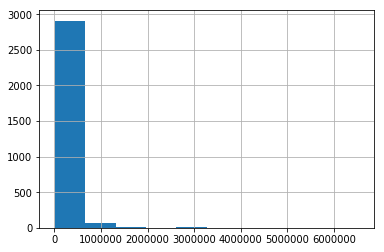

In [100]:
houses_2009['total_appr'].hist();

One downside to a histogram is that it can be highly sensitive to the choice of number of bins.

Since this dataset has a handful of very large outliers, you will only look at home appraised at less than \$1,000,000.

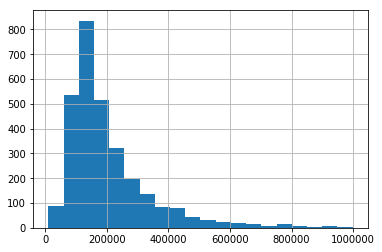

In [101]:
houses_2009[houses_2009['total_appr'] < 1000000]['total_appr'].hist(bins = 20);

As you increase the number of bins, you get more and more detail.

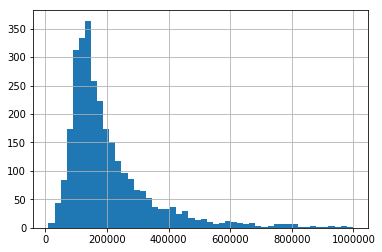

In [102]:
houses_2009[houses_2009['total_appr'] < 1000000]['total_appr'].hist(bins = 50);

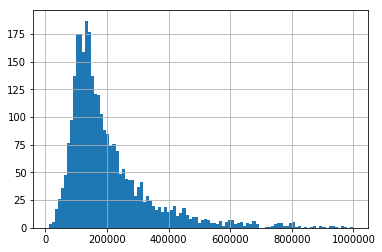

In [103]:
houses_2009[houses_2009['total_appr'] < 1000000]['total_appr'].hist(bins = 100);

But at a certain point, you are getting almost "too much" detail, and it is hard to know if you are actually seeing important aspects of the dataset or you are just seeing relics from the random sampling plus the binning process.

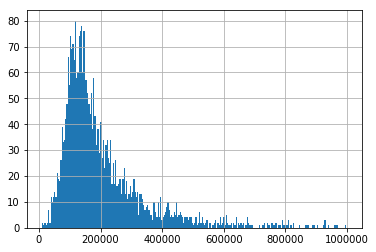

In [104]:
houses_2009[houses_2009['total_appr'] < 1000000]['total_appr'].hist(bins = 250);

As you have seen, the histogram is extremely sensitive to the choice of bins. As an alternative, a Kernel Density Estimation is a way to "smooth" a histogram. One way you can get a density estimate is by using the `distplot` function from `seaborn`. This will create a histogram with a kde superimposed.

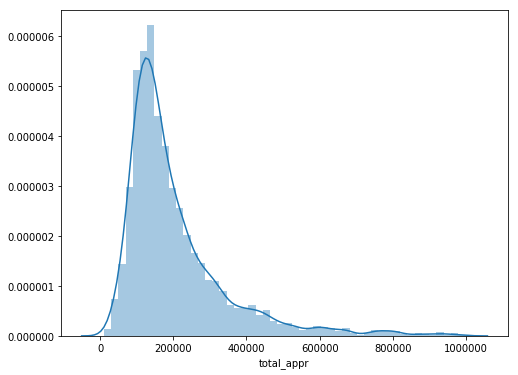

In [105]:
fig, ax = plt.subplots(figsize = (8,6))
sns.distplot(houses_2009[houses_2009['total_appr'] < 1000000]['total_appr']);

If you want just the kernel density estimation, you can use the `kdeplot` instead. Kernel density estimation works by looking at the density of observations within a certain "bandwidth" around each point. you can adjust the bandwidth to see the effect on the density estimation:

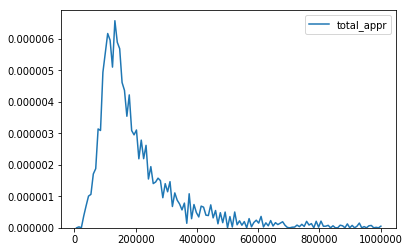

In [106]:
sns.kdeplot(houses_2009[houses_2009['total_appr'] < 1000000]['total_appr'], bw = 1000);

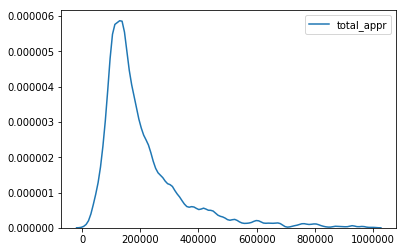

In [107]:
sns.kdeplot(houses_2009[houses_2009['total_appr'] < 1000000]['total_appr'], bw = 10000);

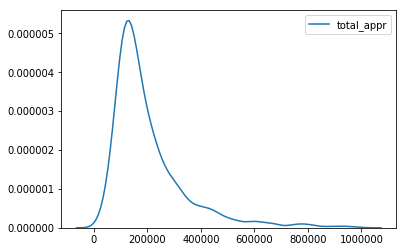

In [108]:
sns.kdeplot(houses_2009[houses_2009['total_appr'] < 1000000]['total_appr'], bw = 25000);

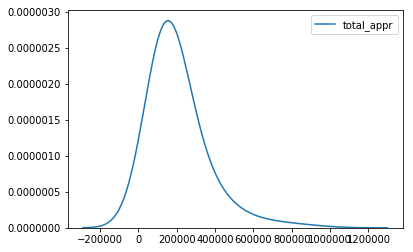

In [109]:
sns.kdeplot(houses_2009[houses_2009['total_appr'] < 1000000]['total_appr'], bw = 100000);

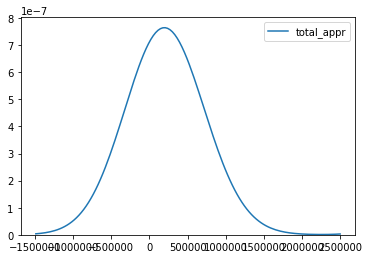

In [110]:
sns.kdeplot(houses_2009[houses_2009['total_appr'] < 1000000]['total_appr'], bw = 500000);

By default, `kdeplot` will use a method to make a guess at a good bandwidth.

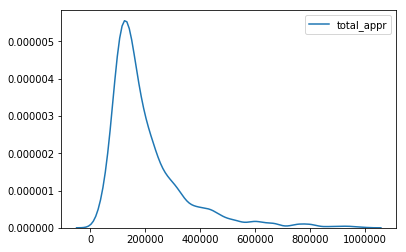

In [111]:
sns.kdeplot(houses_2009[houses_2009['total_appr'] < 1000000]['total_appr']);

You can also compare the distribution of appraisal values across multiple years using both boxplots and violin plots.

In [112]:
nash_appraisal = pd.read_csv('../data/appraisal_sample.csv')

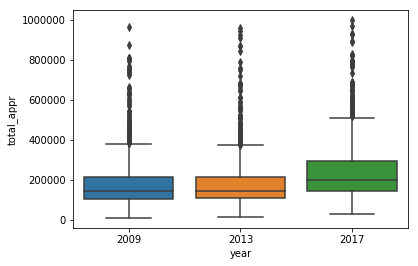

In [113]:
sns.boxplot(data = nash_appraisal[nash_appraisal['total_appr'] < 1000000], 
               x = 'year', y = 'total_appr');

## Qualitative Variables

Recall that qualitative variables are those that fall into two or more levels. For qualitative variables, it is no longer meaningful to compute descriptive statistics such as mean or standard deviation.

The most interesting information in regard to qualitative variables is the number of observations per level.

This can be displayed in a **frequency table**, which shows a count of observations per category.

For this example, we'll look at data from the 2018 Central Park Squirrel Census, which can be obtained from https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw.

In [129]:
squirrels = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
squirrels.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


You can see that one of the variables in the dataset is the primary fur color. If you want to see how many squirrels there were for each fur color, you can use the `value_counts` method from `pandas` to create a frequency table.

In [130]:
squirrels['Primary Fur Color'].value_counts()

Gray        2473
Cinnamon     392
Black        103
Name: Primary Fur Color, dtype: int64

You can see that gray squirrels are by far the most common squirrel spotted in Central Park in the dataset.

If you are not interested in the *number* of observations of each level, but instead the *proportion* of observations in each category, you can add the `normalize = True` argument.

In [131]:
squirrels['Primary Fur Color'].value_counts(normalize = True)

Gray        0.833221
Cinnamon    0.132075
Black       0.034704
Name: Primary Fur Color, dtype: float64

If you want to visualize the frequency per color, you can create a **bar plot**.

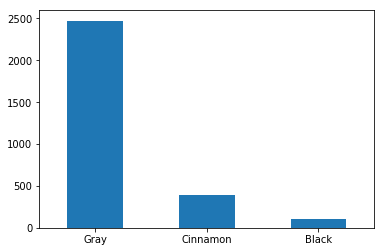

In [132]:
squirrels['Primary Fur Color'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0);